In [23]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [24]:
LOGFILE = 'Out/test-04.csv'
data = pd.read_csv(LOGFILE)
data

,episode,step_count,wall_collisions,box_collisions,train_loss,reward
0,0,0,0,0,0.0,0.000000
1,1,0,7,1,30.0,0.000000
2,2,0,17,2,-2.0,0.000000
3,3,0,18,3,53.0,0.000000
4,4,52,29,4,66.0,115.728990
...,...,...,...,...,...,...
641,641,49494,805,641,326448.0,4879.394569
642,642,49645,807,642,327613.0,4883.547701
643,643,49985,810,643,329625.0,4891.675154
644,644,49998,811,644,329694.0,4891.876839


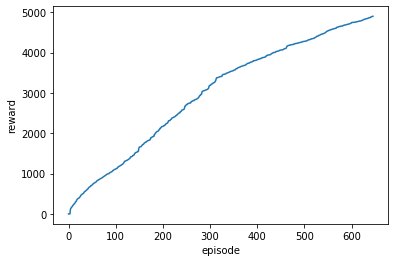

In [28]:
sns.lineplot(data=data,x='episode',y='reward')

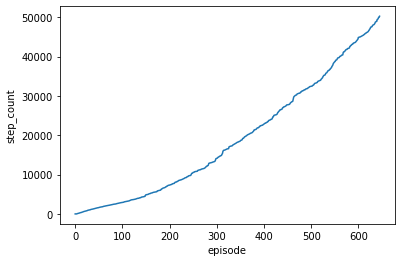

In [26]:
sns.lineplot(data=data,x='episode',y='step_count')

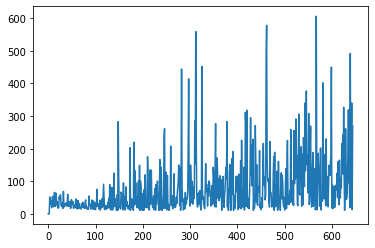

In [27]:
plt.plot(np.diff(data.step_count))

In [10]:
# local files
import os, sys
sys.path.insert(0, '../')
import pyClient
import utils
import model
from model import Transition

import torch
import cv2

In [12]:
# Training parameters
BATCH_SIZE = 128 #original 128
GAMMA = 0.999
EPS_START = 0.
EPS_END = 0.
EPS_DECAY = 0.
DEVICE = 'cpu'
LR_DQN = 0.01

# Environment parameters
IMSIZE = 128
STACK_SIZE = 1
N_ACTIONS = 3
IP  = "127.0.0.1" # Ip address that the TCP/IP interface listens to
PORT = 13000       # Port number that the TCP/IP interface listens to

environment = pyClient.Environment(ip = IP, port = PORT, size = IMSIZE) 
agent = model.DoubleDQNAgent(imsize=IMSIZE,
                 in_channels=STACK_SIZE,
                 n_actions=N_ACTIONS,
                 memory_capacity=12000,
                 eps_start=EPS_START,
                 eps_end=EPS_END,
                 eps_delta=EPS_DECAY,
                 gamma_discount = GAMMA,
                 batch_size = BATCH_SIZE,
                 device=DEVICE)

In [13]:
## Some more training parameters 
MAX_EPISODES = 5 # number of episodes (an episode ends after agent hits a box)
TRAINING_CONDITION = 0 # 0: plain training, 1: complex training, 2: plain testing 3: complex testing

MODEL_PATH = 'Out/test-04.pth'


# How to handle the different end signals
RESET_UPON_END_SIGNAL = {0:False,  # Nothing happened
                         1:True,   # Box collision
                         2:False,   # Wall collision
                         3:False}  # Reached step target


# Load saved model
agent.policy_net.load_state_dict(torch.load(MODEL_PATH))


# Reset counters 
wall_collisions = 0
box_collisions = 0
total_reward = 0
total_loss = 0

for episode in range(int(MAX_EPISODES)):
    
    # Reset environment at start of episode
    _, _, state_raw = environment.reset(TRAINING_CONDITION)
    state = process_state(state_raw).to(DEVICE)
    
    # Episode starts here:
    for t in count(): 
        
        # 1. Agent performs a step (based on the current state) and obtains next state
        action = agent.select_action(state)
        end, reward, next_state_raw = environment.step(action.item())
        next_state = process_state(next_state_raw).to(DEVICE) if not RESET_UPON_END_SIGNAL[end] else None
        
            
        # 2. Store performance and training measures
        total_reward += reward.item();
        if end == 1:
            box_collisions += 1
        if end == 2:
            wall_collisions +=1
        
        # 3. the episode ends here if agent performed any 'lethal' action (specified in RESET_UPON_END_SIGNAL)
        if RESET_UPON_END_SIGNAL[end]:
            break
        else:
            state = next_state

FileNotFoundError: [Errno 2] No such file or directory: 'Out/test-04.pth'